In [431]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('dark_background')
sns.set_style('darkgrid')


from google.colab import drive
import json
import requests

#drive.mount('/content/drive')

%load_ext google.colab.data_table


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


### Provincie Analysis

In [432]:
df_p = pd.read_json('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-province.json')
df_p

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.000000,0.000000,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
5243,2020-04-04T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,1687,,
5244,2020-04-04T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,1362,,
5245,2020-04-04T17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,2547,,
5246,2020-04-04T17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,1608,,


In [0]:
df_p.data = pd.to_datetime(df_p.data)

In [434]:
# Data from Lombardia provinces

lom_p =  df_p[df_p.denominazione_regione == 'Lombardia']
lom_p.reset_index(drop=True, inplace=True)
lom_p.data = lom_p.data.dt.date

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [435]:
lom_p.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24,ITA,3,Lombardia,16,Bergamo,BG,45.694414,9.668425,0,,
1,2020-02-24,ITA,3,Lombardia,17,Brescia,BS,45.539931,10.219103,0,,
2,2020-02-24,ITA,3,Lombardia,13,Como,CO,45.809991,9.085160,0,,
3,2020-02-24,ITA,3,Lombardia,19,Cremona,CR,45.133367,10.024209,0,,
4,2020-02-24,ITA,3,Lombardia,97,Lecco,LC,45.855758,9.393392,0,,


In [0]:
# DF with regional&province data

polenta_p = df_p[(df_p.denominazione_regione == 'Lombardia') | (df_p.denominazione_regione == 'Veneto') | (df_p.denominazione_regione == 'Emilia Romagna') | (df_p.denominazione_regione == 'Piemonte')]

In [0]:
lom_pc = lom_p[~(lom_p.denominazione_provincia == 'In fase di definizione/aggiornamento')]

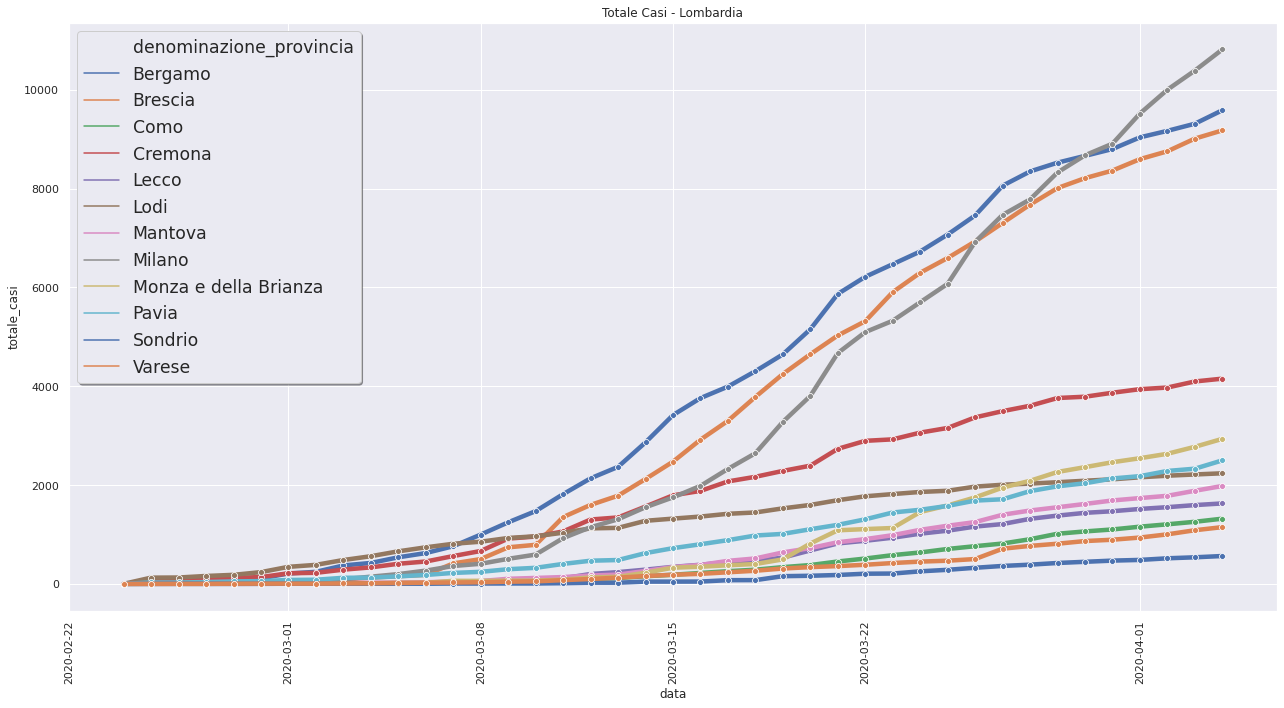

In [438]:
plt.figure(figsize=(18,10))

plt.title('Totale Casi - Lombardia')
sns.lineplot(data=lom_pc, x=lom_pc['data'], y='totale_casi', palette='deep', hue='denominazione_provincia', lw=4.5, n_boot=0, marker='8')
plt.legend(shadow=True, fontsize='x-large')
plt.xticks(rotation=90)
plt.tight_layout()

In [439]:
px.line(lom_pc, x=lom_pc['data'],y='totale_casi',line_group='denominazione_provincia', color='denominazione_provincia', log_y=False, line_shape='linear')

In [440]:
df_p.head(2)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,


In [0]:
df_p['pct_crescita'] = df_p.groupby('denominazione_provincia')['totale_casi'].transform(lambda x: (x.pct_change()*100).round(1))

In [0]:
df_pc = df_p[~(df_p.denominazione_provincia == 'In fase di definizione/aggiornamento')]
df_pc.set_index('data', inplace=True)

In [443]:
prov_latest =  df_pc.sort_index().groupby('denominazione_provincia').tail(1)
prov_latest.head()

,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en,pct_crescita
data,,,,,,,,,,,,
2020-04-04 17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,317,,,2.3
2020-04-04 17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,174,,,4.8
2020-04-04 17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,700,,,4.6
2020-04-04 17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,437,,,4.5
2020-04-04 17:00:00,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,125,,,0.8


In [444]:
prov_latest.sort_values(by='pct_crescita', ascending=False)

,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en,pct_crescita
data,,,,,,,,,,,,
2020-04-04 17:00:00,ITA,14,Molise,94,Isernia,IS,41.588008,14.225754,40,,,166.7
2020-04-04 17:00:00,ITA,8,Emilia-Romagna,38,Ferrara,FE,44.835991,11.618689,474,,,28.8
2020-04-04 17:00:00,ITA,19,Sicilia,81,Trapani,TP,38.018501,12.513657,94,,,16.0
2020-04-04 17:00:00,ITA,19,Sicilia,85,Caltanissetta,CL,37.492132,14.061850,93,,,12.0
2020-04-04 17:00:00,ITA,7,Liguria,10,Genova,GE,44.411493,8.932699,1312,,,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-04 17:00:00,ITA,12,Lazio,57,Rieti,RI,42.404884,12.862059,188,,,0.0
2020-04-04 17:00:00,ITA,20,Sardegna,111,Sud Sardegna,SU,39.166415,8.526243,63,,,0.0
2020-04-04 17:00:00,ITA,20,Sardegna,91,Nuoro,NU,40.323188,9.330296,62,,,0.0


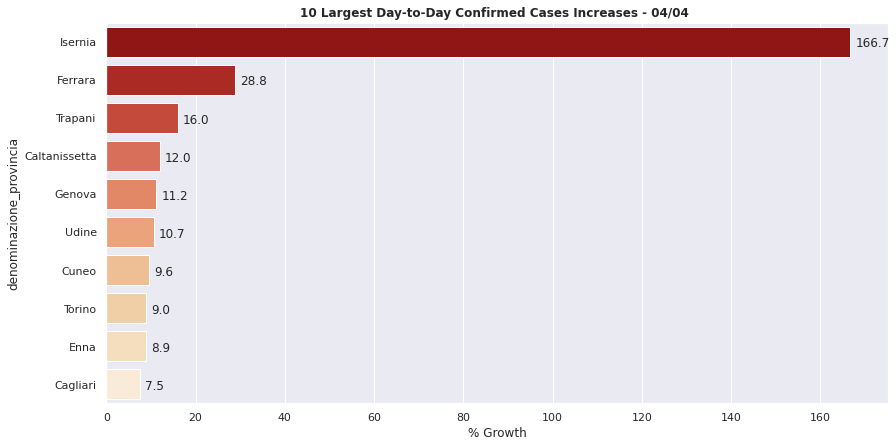

In [492]:
plt.figure(figsize=(14,7))
plt.title('10 Largest Day-to-Day Confirmed Cases Increases - 04/04 ', fontweight='bold')
ax=sns.barplot(data=prov_latest.sort_values(by='pct_crescita', ascending=False).head(10), x='pct_crescita', y='denominazione_provincia', palette='OrRd_r')
plt.xlabel('% Growth')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.8),
                xytext=(5, 10), textcoords='offset points')

In [487]:
df_p[df_p.denominazione_provincia == 'Isernia']

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en,pct_crescita
68,2020-02-24 18:00:00,ITA,14,Molise,94,Isernia,IS,41.588008,14.225754,0,,,NaN
196,2020-02-25 18:00:00,ITA,14,Molise,94,Isernia,IS,41.588008,14.225754,0,,,NaN
324,2020-02-26 18:00:00,ITA,14,Molise,94,Isernia,IS,41.588008,14.225754,0,,,NaN
452,2020-02-27 18:00:00,ITA,14,Molise,94,Isernia,IS,41.588008,14.225754,0,,,NaN
580,2020-02-28 18:00:00,ITA,14,Molise,94,Isernia,IS,41.588008,14.225754,0,,,NaN
708,2020-02-29 17:00:00,ITA,14,Molise,94,Isernia,IS,41.588008,14.225754,0,,,NaN
836,2020-03-01 17:00:00,ITA,14,Molise,94,Isernia,IS,41.588008,14.225754,0,,,NaN
964,2020-03-02 17:00:00,ITA,14,Molise,94,Isernia,IS,41.588008,14.225754,0,,,NaN
1092,2020-03-03 17:00:00,ITA,14,Molise,94,Isernia,IS,41.588008,14.225754,0,,,NaN
1220,2020-03-04 17:00:00,ITA,14,Molise,94,Isernia,IS,41.588008,14.225754,0,,,NaN


### Analysis by region

In [446]:
regioni = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv', parse_dates=True, index_col='data')
regioni.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
data,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN
2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN
2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN
2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN


In [0]:
regioni['nuovi_tamponi'] = regioni.groupby('denominazione_regione')['tamponi'].transform(lambda x: x.diff())

In [448]:
# filtering for latest timestamp

reg_latest = regioni.sort_index().groupby('denominazione_regione').tail(1)
reg_latest.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en,nuovi_tamponi
data,,,,,,,,,,,,,,,,,,,
2020-04-04 17:00:00,ITA,13,Abruzzo,42.351222,13.398438,354,71,425,931,1356,55,65,119,153,1628,12837,NaN,NaN,947.0
2020-04-04 17:00:00,ITA,17,Basilicata,40.639471,15.805148,44,19,63,181,244,-3,3,9,11,264,2765,NaN,NaN,143.0
2020-04-04 17:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,291,61,352,849,1201,-8,33,245,146,1592,15045,NaN,NaN,1069.0
2020-04-04 17:00:00,ITA,18,Calabria,38.905976,16.594402,178,15,193,469,662,0,8,30,49,741,12314,NaN,NaN,706.0
2020-04-04 17:00:00,ITA,15,Campania,40.839566,14.250850,567,114,681,1815,2496,144,151,146,186,2828,21534,NaN,NaN,2297.0


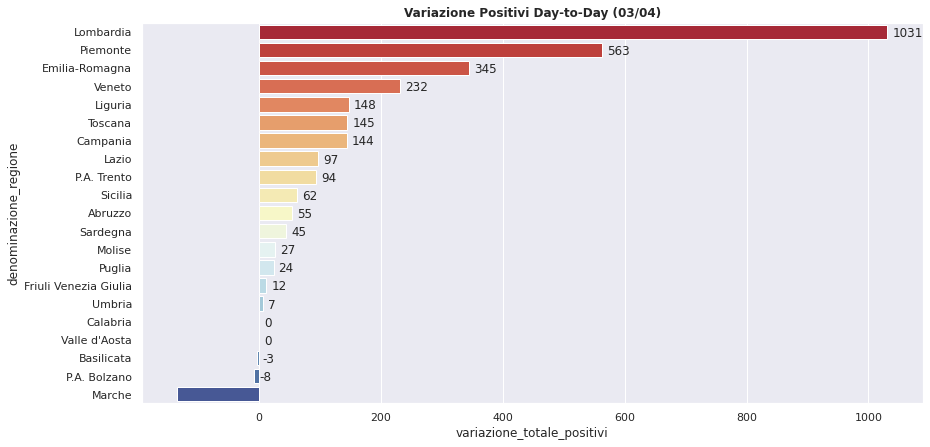

In [449]:
reg_latest.sort_values(by='variazione_totale_positivi', ascending=False, inplace=True)
plt.figure(figsize=(14,7))
plt.title('Variazione Positivi Day-to-Day (04/04)', fontweight='bold')
ax=sns.barplot(data=reg_latest, x='variazione_totale_positivi', palette='RdYlBu', y=reg_latest.denominazione_regione)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

### Analysis of Testing (Tamponi)

In [0]:
lombardia = regioni[regioni.denominazione_regione == 'Lombardia']
lombardia.index = lombardia.index.date

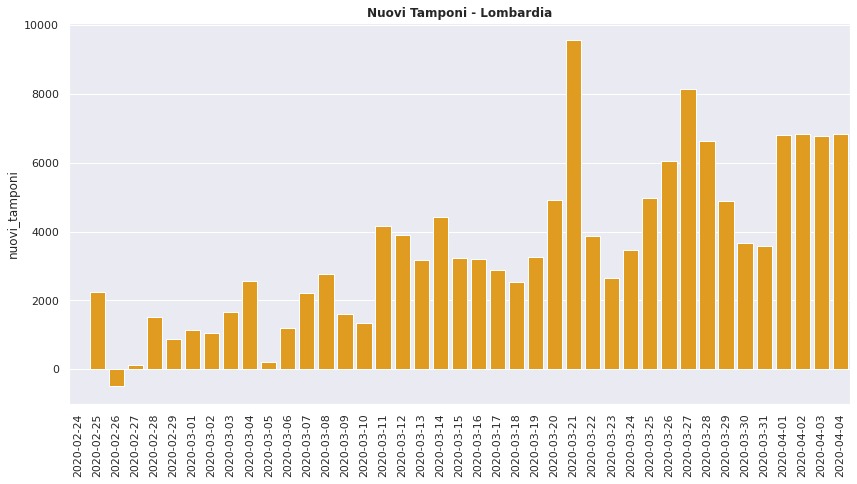

In [451]:
# New daily tests (Lombardia)

plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.title('Nuovi Tamponi - Lombardia', fontweight='bold')
sns.barplot(data=lombardia, x=lombardia.index, y='nuovi_tamponi', color='orange')


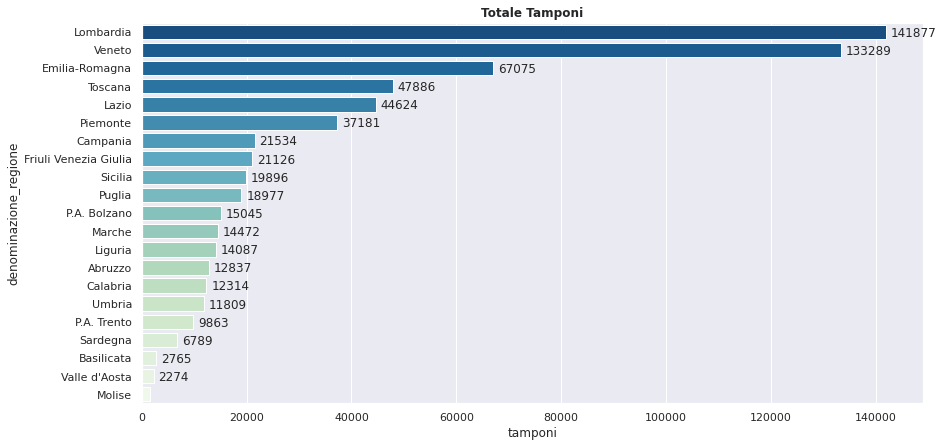

In [452]:
# Total tests carried out by region

reg_latest.sort_values(by='tamponi', ascending=False,inplace=True)
plt.figure(figsize=(14,7))
plt.title('Totale Tamponi', fontweight='bold')
ax=sns.barplot(data=reg_latest, x=reg_latest['tamponi'].astype(int), y=reg_latest.denominazione_regione, palette='GnBu_r')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

In [453]:
pop = pd.read_html('https://www.tuttitalia.it/regioni/popolazione/', encoding='utf-8')
popdf = pd.DataFrame(pop[0])
popdf = popdf[['Regione','Popolazioneresidenti', popdf.columns[4]]]
popdf.set_index('Regione', inplace=True)
popdf.head()

,Popolazioneresidenti,Densitàabitanti/km²
Regione,,
Lombardia,10.060.574,422
Lazio,5.879.082,341
Campania,5.801.692,424
Sicilia,4.999.891,194
Veneto,4.905.854,267


In [0]:
popdf.rename(columns={list(popdf)[1]:'densita'}, inplace=True)

In [455]:
reg_merged = reg_latest.merge(right=popdf, how='left', left_on=reg_latest.denominazione_regione, right_on=popdf.index)
reg_merged.rename(columns={'key_0':'Regione'}, inplace=True)
reg_merged.set_index('Regione', drop=True, inplace=True)
reg_merged.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en,nuovi_tamponi,Popolazioneresidenti,densita
Regione,,,,,,,,,,,,,,,,,,,,,
Lombardia,ITA,3,Lombardia,45.466794,9.190347,12002,1326,13328,13892,27220,1031,1598,13242,8656,49118,141877,NaN,NaN,6826.0,10.060.574,422.0
Veneto,ITA,5,Veneto,45.434905,12.338452,1691,324,2015,7078,9093,232,360,1124,607,10824,133289,NaN,NaN,6799.0,4.905.854,267.0
Emilia-Romagna,ITA,8,Emilia-Romagna,44.494367,11.341721,3859,358,4217,8306,12523,345,608,2040,1977,16540,67075,NaN,NaN,3393.0,4.459.477,199.0
Toscana,ITA,9,Toscana,43.769231,11.255889,1129,286,1415,3639,5054,145,172,310,307,5671,47886,NaN,NaN,3426.0,3.729.641,162.0
Lazio,ITA,12,Lazio,41.892770,12.483667,1236,193,1429,1677,3106,97,157,439,212,3757,44624,NaN,NaN,848.0,5.879.082,341.0


In [0]:
# Drop P.A. Bolzano & P.A. Trento due to inconsistency with the region format (They are a province rather than a region)
# Drop "note" columns
# Column Popolazioneresidenti has dtype string. Need to remove "." and convert to_numeric

reg_merged.drop([reg_merged.index[16], reg_merged.index[11]], inplace=True)
reg_merged.dropna(how='all', axis=1, inplace=True)
reg_merged.Popolazioneresidenti = pd.to_numeric(reg_merged.Popolazioneresidenti.str.replace('.',''))

In [457]:
reg_merged.nuovi_tamponi.sum()

35711.0

In [0]:
 reg_merged['Tamponi_x_1000_Abitanti'] = ((reg_merged.tamponi/reg_merged.Popolazioneresidenti)*1000).round(1)

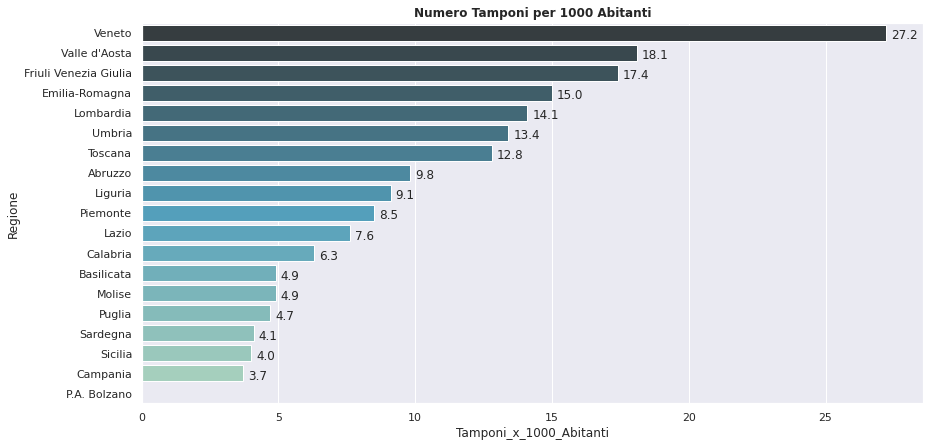

In [459]:
reg_merged.sort_values(by='Tamponi_x_1000_Abitanti', ascending=False, inplace=True)
plt.figure(figsize=(14,7))
plt.title('Numero Tamponi per 1000 Abitanti', fontweight='bold')
ax=sns.barplot(data=reg_merged, x='Tamponi_x_1000_Abitanti', y=reg_merged.index, palette='GnBu_d')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

In [460]:
reg_merged.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,nuovi_tamponi,Popolazioneresidenti,densita,Tamponi_x_1000_Abitanti
Regione,,,,,,,,,,,,,,,,,,,,
Veneto,ITA,5,Veneto,45.434905,12.338452,1691,324,2015,7078,9093,232,360,1124,607,10824,133289,6799.0,4905854.0,267.0,27.2
Valle d'Aosta,ITA,2,Valle d'Aosta,45.737503,7.320149,63,23,86,474,560,0,29,106,82,748,2274,168.0,125666.0,39.0,18.1
Friuli Venezia Giulia,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,183,50,233,1103,1336,12,107,505,145,1986,21126,1141.0,1215220.0,153.0,17.4
Emilia-Romagna,ITA,8,Emilia-Romagna,44.494367,11.341721,3859,358,4217,8306,12523,345,608,2040,1977,16540,67075,3393.0,4459477.0,199.0,15.0
Lombardia,ITA,3,Lombardia,45.466794,9.190347,12002,1326,13328,13892,27220,1031,1598,13242,8656,49118,141877,6826.0,10060574.0,422.0,14.1


So far I have:
1. regioni: df with all the original data and datetime index
2. reg_latest: df with the data from the latest timestamp
3. reg_merged: reg_latest with population and density data




In [461]:
regioni.head(3)

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en,nuovi_tamponi
data,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN


In [0]:
reg_merged['nuovi_contagiati_nuovi_tamponi'] = (reg_merged.nuovi_positivi/reg_merged.nuovi_tamponi)*100

In [463]:
reg_merged.head(2)

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,nuovi_tamponi,Popolazioneresidenti,densita,Tamponi_x_1000_Abitanti,nuovi_contagiati_nuovi_tamponi
Regione,,,,,,,,,,,,,,,,,,,,,
Veneto,ITA,5,Veneto,45.434905,12.338452,1691,324,2015,7078,9093,232,360,1124,607,10824,133289,6799.0,4905854.0,267.0,27.2,5.294896
Valle d'Aosta,ITA,2,Valle d'Aosta,45.737503,7.320149,63,23,86,474,560,0,29,106,82,748,2274,168.0,125666.0,39.0,18.1,17.261905


In [0]:
reg_merged['nuovi_tamponi_x_1000'] = (reg_merged.nuovi_tamponi/reg_merged.Popolazioneresidenti)*1000


In [465]:
reg_merged.head(2)

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,nuovi_tamponi,Popolazioneresidenti,densita,Tamponi_x_1000_Abitanti,nuovi_contagiati_nuovi_tamponi,nuovi_tamponi_x_1000
Regione,,,,,,,,,,,,,,,,,,,,,,
Veneto,ITA,5,Veneto,45.434905,12.338452,1691,324,2015,7078,9093,232,360,1124,607,10824,133289,6799.0,4905854.0,267.0,27.2,5.294896,1.385895
Valle d'Aosta,ITA,2,Valle d'Aosta,45.737503,7.320149,63,23,86,474,560,0,29,106,82,748,2274,168.0,125666.0,39.0,18.1,17.261905,1.336877


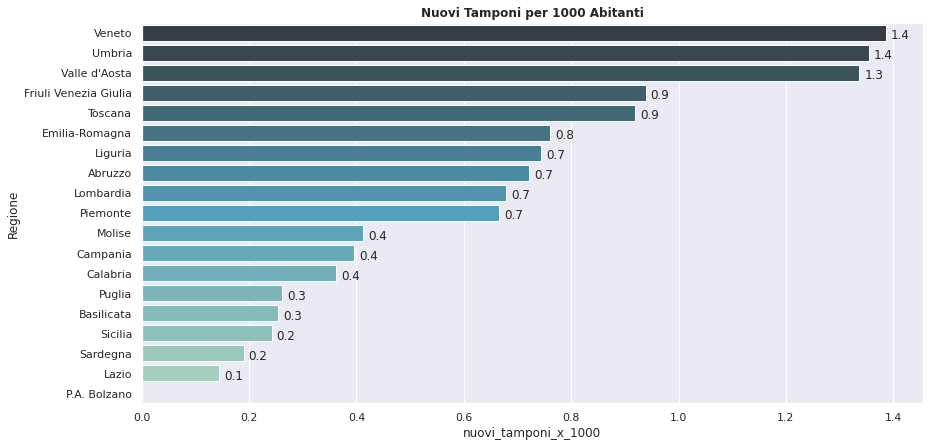

In [466]:
reg_merged.sort_values(by='nuovi_tamponi_x_1000', ascending=False, inplace=True)
plt.figure(figsize=(14,7))
plt.title('Nuovi Tamponi per 1000 Abitanti', fontweight='bold')
ax=sns.barplot(data=reg_merged, x='nuovi_tamponi_x_1000', y=reg_merged.index, palette='GnBu_d')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

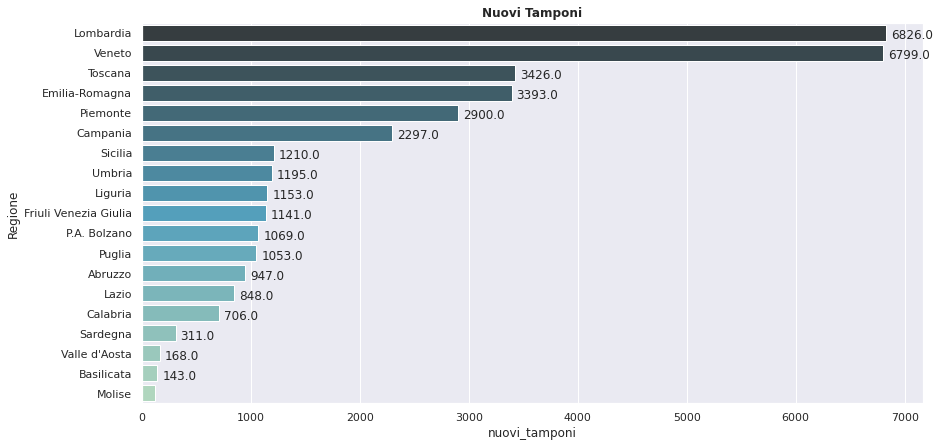

In [467]:
reg_merged.sort_values(by='nuovi_tamponi', ascending=False, inplace=True)
plt.figure(figsize=(14,7))
plt.title('Nuovi Tamponi', fontweight='bold')
ax=sns.barplot(data=reg_merged, x='nuovi_tamponi', y=reg_merged.index, palette='GnBu_d')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

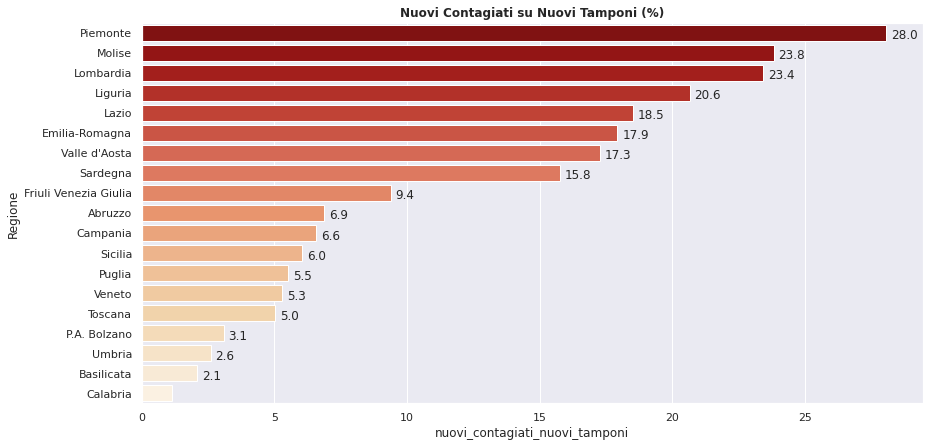

In [468]:
reg_merged.sort_values(by='nuovi_contagiati_nuovi_tamponi', ascending=False, inplace=True)
plt.figure(figsize=(14,7))
plt.title('Nuovi Contagiati su Nuovi Tamponi (%)', fontweight='bold')
ax=sns.barplot(data=reg_merged, x='nuovi_contagiati_nuovi_tamponi', y=reg_merged.index, palette='OrRd_r')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

In [469]:
reg_merged.nuovi_tamponi.sum()

35711.0

### Hospitalisations and ICU data

In [470]:
regioni.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en,nuovi_tamponi
data,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN,NaN


In [0]:
# Obtaining deltas in hospitalisation and home-isolation quantities. Adding columns to Regioni


regioni['delta_osp'] = regioni.groupby('denominazione_regione')['totale_ospedalizzati'].transform(lambda x: x.diff())
regioni['delta_ti'] = regioni.groupby('denominazione_regione')['terapia_intensiva'].transform(lambda x: x.diff())
regioni['delta_iso'] = regioni.groupby('denominazione_regione')['isolamento_domiciliare'].transform(lambda x: x.diff())

In [0]:
regioni.reset_index(inplace=True)

In [0]:
regioni_mi = regioni.set_index(['data','denominazione_regione'])

In [474]:
reg_latest = regioni_mi.loc[[regioni_mi.index.get_level_values(0)[-1]]]
reg_latest.head()

stato  ...  delta_iso
data                denominazione_regione        ...           
2020-04-04 17:00:00 Abruzzo                 ITA  ...       67.0
                    Basilicata              ITA  ...       -6.0
                    P.A. Bolzano            ITA  ...       -9.0
                    Calabria                ITA  ...        7.0
                    Campania                ITA  ...      110.0

[5 rows x 21 columns]

In [475]:
reg_latest['dummy_osp'] = reg_latest['delta_osp'] > 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



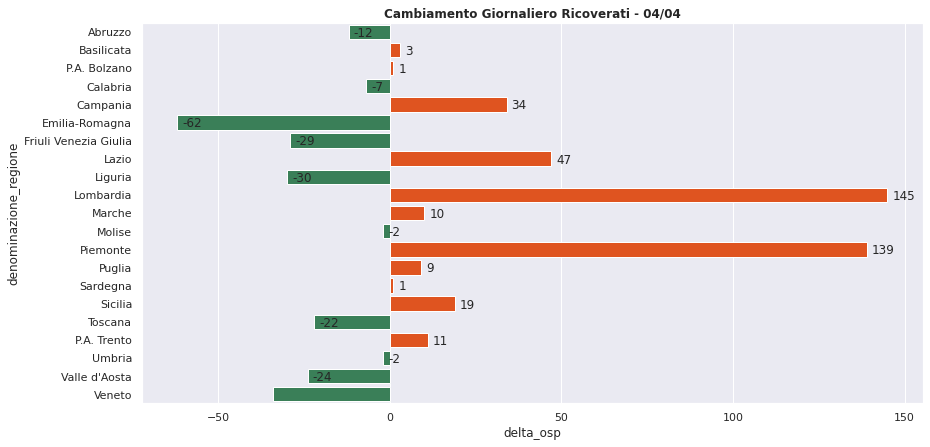

In [476]:
plt.figure(figsize=(14,7))
plt.title('Cambiamento Giornaliero Ricoverati - 04/04', fontweight='bold')
ax = sns.barplot(data = reg_latest, x='delta_osp', y=reg_latest.index.get_level_values(1), palette=(reg_latest['delta_osp'] > 0).map({True:'orangered',False:'seagreen'}))
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

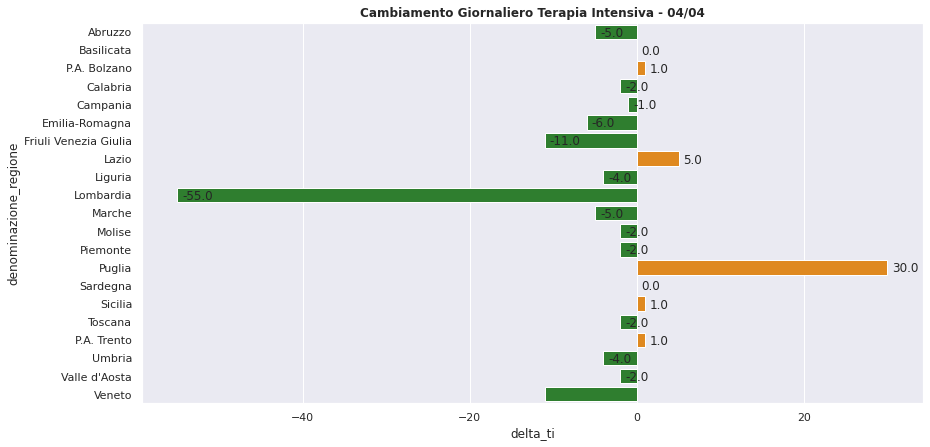

In [477]:
plt.figure(figsize=(14,7))
plt.title('Cambiamento Giornaliero Terapia Intensiva - 04/04', fontweight='bold')
ax=sns.barplot(data = reg_latest, x='delta_ti', y=reg_latest.index.get_level_values(1), color='orange', palette=(reg_latest['delta_ti'] > 0).map({True:'darkorange',False:'forestgreen'}))
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

In [478]:
reg_merged.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,nuovi_tamponi,Popolazioneresidenti,densita,Tamponi_x_1000_Abitanti,nuovi_contagiati_nuovi_tamponi,nuovi_tamponi_x_1000
Regione,,,,,,,,,,,,,,,,,,,,,,
Piemonte,ITA,1,Piemonte,45.073274,7.680687,3441,450,3891,5802,9693,563,813,888,1128,11709,37181,2900.0,4356406.0,172.0,8.5,28.034483,0.665686
Molise,ITA,14,Molise,41.557748,14.659161,31,6,37,134,171,27,30,24,11,206,1504,126.0,305617.0,69.0,4.9,23.809524,0.412281
Lombardia,ITA,3,Lombardia,45.466794,9.190347,12002,1326,13328,13892,27220,1031,1598,13242,8656,49118,141877,6826.0,10060574.0,422.0,14.1,23.410489,0.678490
Liguria,ITA,7,Liguria,44.411493,8.932699,1121,169,1290,1604,2894,148,238,767,542,4203,14087,1153.0,1550640.0,286.0,9.1,20.641804,0.743564
Lazio,ITA,12,Lazio,41.892770,12.483667,1236,193,1429,1677,3106,97,157,439,212,3757,44624,848.0,5879082.0,341.0,7.6,18.514151,0.144240


In [0]:
# Percentage of cases in hospital



reg_merged['perc_ospedalizzati'] = ((reg_merged.totale_ospedalizzati/reg_merged.totale_positivi)*100).round(1)
reg_merged['perc_ti'] = ((reg_merged.terapia_intensiva/reg_merged.totale_positivi)*100).round(1)


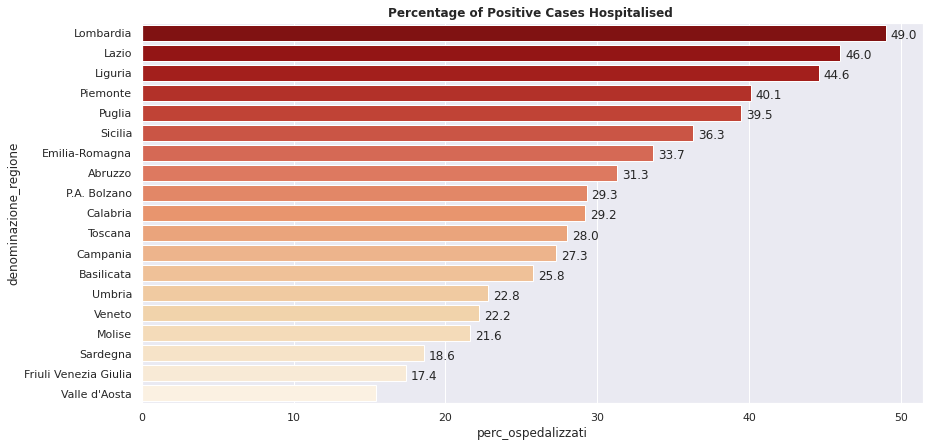

In [480]:
plt.figure(figsize=(14,7))
plt.title('Percentage of Positive Cases Hospitalised ', fontweight='bold')

ax=sns.barplot(data=reg_merged.sort_values(by='perc_ospedalizzati', ascending=False), y='denominazione_regione', x='perc_ospedalizzati', palette='OrRd_r')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

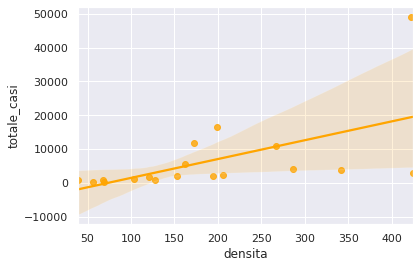

In [481]:

sns.regplot(data=reg_merged, x='densita', y='totale_casi', color='orange')

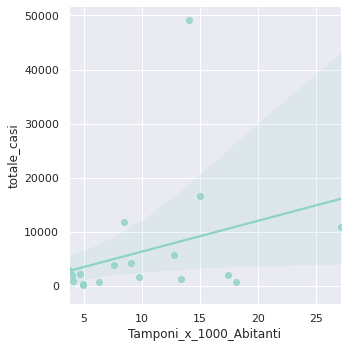

In [482]:
sns.lmplot(data=reg_merged, x='Tamponi_x_1000_Abitanti', y='totale_casi')

In [483]:
pd.read_html('https://it.qwe.wiki/wiki/List_of_Italian_regions_by_GDP#Per_capita_GDP')[0]

,Rango,Regione,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,% Della Nazione
0,1,Lombardia,257.315,270.005,281.977,291.488,301.791,310.195,319.728,333.047,346.189,330.594,345.569,352.857,346.972,344.407,351.831,359.349,366.541,21.81
1,2,Lazio,135.579,143.912,151.451,156.104,166.260,171.116,177.058,184.742,185.199,182.492,184.141,187.649,182.525,180.802,181.792,183.000,185.935,11.06
2,3,Veneto,112.686,116.875,119.679,125.795,132.334,136.174,141.078,146.984,147.220,142.048,144.738,149.232,146.773,147.023,149.603,152.656,155.515,9.25
3,4,Emilia-Romagna,106.967,111.321,115.006,118.585,123.614,127.191,134.164,140.856,142.842,135.581,138.755,144.413,142.532,143.796,146.812,149.693,153.997,9.16
4,5,Piemonte,100.449,104.622,108.148,112.347,116.777,120.012,124.739,128.808,129.164,120.669,125.313,128.104,123.950,125.353,125.444,127.866,129.322,7.70
5,6,Toscana,80.776,84.609,87.702,90.840,94.400,96.425,100.696,104.999,106.096,104.029,105.152,107.704,107.241,106.456,108.516,110.182,112.239,6.68
6,7,Campania,82.289,86.662,90.435,92.392,95.408,97.907,101.682,105.126,105.537,102.678,101.430,101.213,100.738,99.202,99.880,102.422,106.753,6.35
7,8,Sicilia,69.928,73.669,75.977,78.751,81.124,84.770,88.154,90.005,91.120,88.796,88.966,88.712,88.049,86.722,84.888,86.661,86.998,5.18
8,9,Puglia,57.708,60.045,61.630,63.246,65.224,66.581,69.479,71.143,70.506,68.785,69.990,71.267,71.702,70.115,70.654,72.167,72.406,4.31
9,10,Liguria,37.131,39.234,39.839,41.522,43.080,44.322,45.695,48.203,49.254,46.986,46.688,47.630,46.801,46.347,47.180,47.958,48.287,287.00


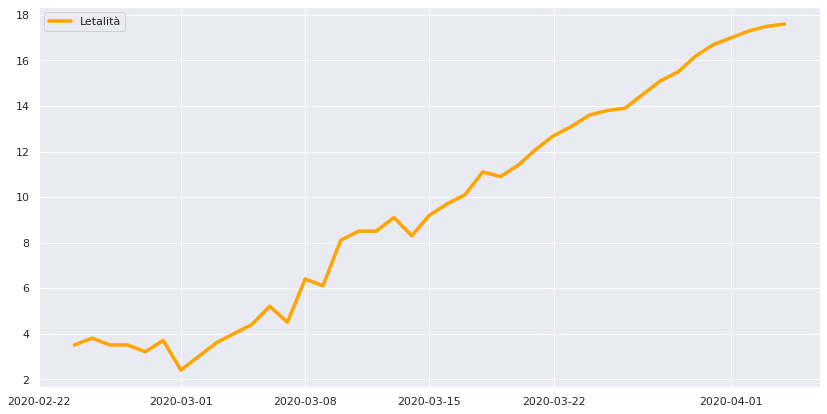

In [484]:
plt.figure(figsize=(14,7))

sns.set()
sns.lineplot(data=lombardia, x=lombardia.index, y=((lombardia.deceduti/lombardia.totale_casi)*100).round(1), color='orange', markers=True, lw=3.5, label='Letalità')


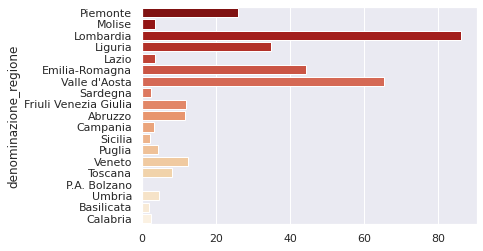

In [494]:
sns.barplot(data=reg_merged, x=((reg_merged.deceduti/reg_merged.Popolazioneresidenti)*100000).round(1).sort_values(ascending=False), y='denominazione_regione', palette='OrRd_r')

In [1]:
! echo "# Covid_19Italia-Data-Viz" >> README.md
! git init
! git add README.md
! git commit -m "first commit"
! git remote add origin https://github.com/RomanTomz/Covid_19Italia-Data-Viz.git
! git push -u origin master

Initialized empty Git repository in /content/.git/

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@571724b3fc3b.(none)')
error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/RomanTomz/Covid_19Italia-Data-Viz.git'
